In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) #Keep all the columns visible
df= pd.read_csv('Amazon Sale Report.csv', low_memory=False)
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [2]:
#### Initial Data Inspection ####

# Before cleaning the data, we'll assess the raw dataset then perform clean up steps. 

In [3]:
#Dataset Information
print(f"Dataset shape: {df.shape} rows x {len(df.columns)} columns") 


Dataset shape: (128975, 24) rows x 24 columns


In [4]:
#Shows column types
df.info()
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB") #adds up total MBs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
total_dups = df.duplicated().sum()
print(f"Total duplicate rows: {total_dups}")

Total duplicate rows: 0


In [6]:
# Determing null (NaN) cell information 
missing_pct = df.isnull().sum() / len(df) *100
print ("NaN % per column (sort descending): \n", missing_pct[missing_pct > 0]. sort_values(ascending=False))
print(f"\n Total NAN cells: {df.isnull().sum().sum()}")
print(f"Dataset shape: {df.shape}")

NaN % per column (sort descending): 
 fulfilled-by        69.546811
promotion-ids       38.110487
Unnamed: 22         38.030626
currency             6.043807
Amount               6.043807
Courier Status       5.328164
ship-postal-code     0.025586
ship-state           0.025586
ship-city            0.025586
ship-country         0.025586
dtype: float64

 Total NAN cells: 210495
Dataset shape: (128975, 24)


In [7]:
df.describe() #Summary Statistics on current numerical columns

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [8]:
#### Categorical Variable Profiling ####


In [9]:
## Variable Profile ##
#Status column
status_counts = df['Status'].value_counts()
print("Status unique values & counts:\n", status_counts)
print(f"\nTotal unique Status types: {status_counts.count()}")
print(f"Most common: {status_counts.index[0]} ({status_counts.iloc[0]} rows")

Status unique values & counts:
 Status
Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64

Total unique Status types: 13
Most common: Shipped (77804 rows


In [10]:
## Variable Profile ##
#Sales channel column 
channel_counts =df['Sales Channel'].value_counts()
print("Sales channel unique values & counts: \n", channel_counts)
print(f"\nTotal unique channels: {channel_counts.count()}")
print(f"Dominant: {channel_counts.index[0]}({channel_counts.iloc[0]} rows, {channel_counts.iloc[0]/len(df)*100:.1f}%)")

KeyError: 'Sales Channel'

In [11]:
# Debug: List all exact column names
print("Exact column names:\n", df.columns.tolist())
print("\nAny with 'sales' or 'channel'?\n", [col for col in df.columns if 'sales' in col.lower() or 'channel' in col.lower()])

Exact column names:
 ['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by', 'Unnamed: 22']

Any with 'sales' or 'channel'?
 ['Sales Channel ']


In [12]:
#Looks like the Sales Channel column has an extra space in it.
#Fixing all extra spaces and capitalizing to standardize. 
df.columns = df.columns.str.strip()
df.columns = df.columns.str.title()

#Verify
print("Cleaned column names: \n", df.columns.tolist())
print("\n'Sales Channel' now exists?", 'Sales Channel' in df.columns)
    

Cleaned column names: 
 ['Index', 'Order Id', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 'Ship-Service-Level', 'Style', 'Sku', 'Category', 'Size', 'Asin', 'Courier Status', 'Qty', 'Currency', 'Amount', 'Ship-City', 'Ship-State', 'Ship-Postal-Code', 'Ship-Country', 'Promotion-Ids', 'B2B', 'Fulfilled-By', 'Unnamed: 22']

'Sales Channel' now exists? True


In [13]:
#Sales channel column 2.0
channel_counts =df['Sales Channel'].value_counts()
print("Sales channel unique values & counts: \n", channel_counts)
print(f"\nTotal unique channels: {channel_counts.count()}")
print(f"Dominant: {channel_counts.index[0]}({channel_counts.iloc[0]} rows, {channel_counts.iloc[0]/len(df)*100:.1f}%)")

Sales channel unique values & counts: 
 Sales Channel
Amazon.in     128851
Non-Amazon       124
Name: count, dtype: int64

Total unique channels: 2
Dominant: Amazon.in(128851 rows, 99.9%)


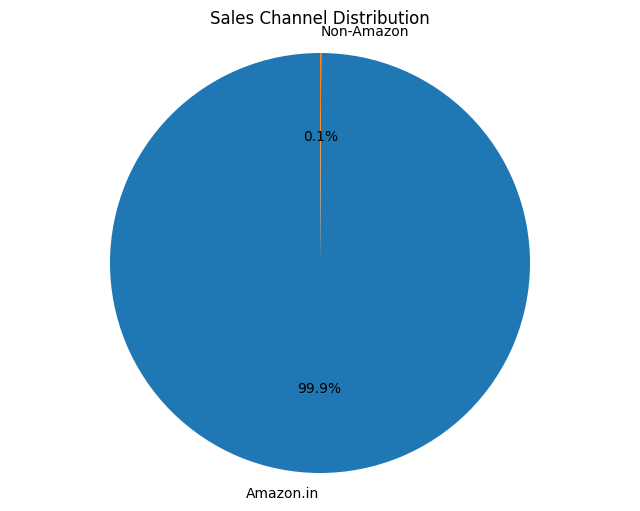

Breakdown:
 Sales Channel
Amazon.in     128851
Non-Amazon       124
Name: count, dtype: int64
Amazon.in share: 99.90%


In [14]:
#"Sales Channel Visual" 
#99.99% of Sales Channel is Amazon.in but why .01% Non-Amazon?

import matplotlib.pyplot as plt
import seaborn as sns

channel_counts = df['Sales Channel'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6)) 
plt.pie(channel_counts.values, labels=channel_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Channel Distribution')
plt.axis('equal')  
plt.show()

print("Breakdown:\n", channel_counts)
print(f"Amazon.in share: {channel_counts.iloc[0]/len(df)*100:.2f}%")


In [15]:
## Variable Profile ##
# Ship-Service-Level

service_counts = df['Ship-Service-Level'].value_counts()
print("ship-service-level unique values & counts:\n", service_counts)
print(f"\nTotal unique Levels: {service_counts.count()}")
print(f"Most common: {service_counts.index[0]} ({service_counts.iloc[0]} rows, {service_counts.iloc[0]/len(df)*100:.1f}%)")

ship-service-level unique values & counts:
 Ship-Service-Level
Expedited    88615
Standard     40360
Name: count, dtype: int64

Total unique Levels: 2
Most common: Expedited (88615 rows, 68.7%)


In [16]:
## Variable Profile ##
#Promotion -Ids

promo_counts = df['Promotion-Ids'].value_counts()  
print("promotion-ids unique values & counts (top 10):\n", promo_counts.head(10))
print(f"\nTotal unique promos: {len(df['Promotion-Ids'].unique())}")
print(f"Most common: {promo_counts.index[0]} ({promo_counts.iloc[0]} rows, {promo_counts.iloc[0]/len(df)*100:.1f}%)")


promotion-ids unique values & counts (top 10):
 Promotion-Ids
IN Core Free Shipping 2015/04/08 23-48-5-108                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [17]:
## Variable Profile ## 
#Fulfilled -By

fulfilled_counts = df['Fulfilled-By'].value_counts()
print("fulfilled-by unique values & counts:\n", fulfilled_counts)
print(f"\nTotal unique partners: {len(df['Fulfilled-By'].unique())}")
print(f"Most common: {fulfilled_counts.index[0]} ({fulfilled_counts.iloc[0]} rows, {fulfilled_counts.iloc[0]/len(df)*100:.1f}%)")

fulfilled-by unique values & counts:
 Fulfilled-By
Easy Ship    39277
Name: count, dtype: int64

Total unique partners: 2
Most common: Easy Ship (39277 rows, 30.5%)


In [18]:
## Variable Profile ##
#Category


cat_counts = df['Category'].value_counts().head(10)
print("Category unique values & counts (top 10):\n", cat_counts)
print(f"\nTotal unique categories: {len(df['Category'].unique())}")
print(f"Top category share: {cat_counts.iloc[0]/len(df)*100:.1f}%")
print(f"Top 3 sum: {cat_counts.iloc[0:3].sum() / len(df) * 100:.1f}% of total orders")


Category unique values & counts (top 10):
 Category
Set              50284
kurta            49877
Western Dress    15500
Top              10622
Ethnic Dress      1159
Blouse             926
Bottom             440
Saree              164
Dupatta              3
Name: count, dtype: int64

Total unique categories: 9
Top category share: 39.0%
Top 3 sum: 89.7% of total orders


In [19]:
#### Data Cleaning ####

In [20]:
df = df.copy()

# Drop junk/constant columns 
junk_cols = ['index', 'Unnamed: 22']
constant_cols = ['currency']  
for col in junk_cols + constant_cols:
    if col in df.columns:
        df = df.drop(columns=[col])
        print(f"Dropped '{col}'")

# Drop rows missing core (Amount/Date—minimal loss)
df = df.dropna(subset=['Amount', 'Date'])
print(f"Shape after core drops: {df.shape}")


fills = {
    'Courier Status': 'Cancelled',  
    'Promotion-Ids': 'None',  # No-promo
    'Fulfilled-By': 'Amazon',  
    'Ship-City': 'Unknown City',
    'Ship-State': 'Unknown State',
    'Ship-Postal-Code': 0, # Numeric default
    'Ship-Country': 'Unknown-Country',
    'B2B': False  # Bool default
}
for col, value in fills.items():
    if col in df.columns:
        mask = df[col].isnull()
        df.loc[mask, col] = value
        print(f"Filled '{col}' NaNs with '{value}' ({mask.sum()} rows)")

# Verify impact
print(f"\nFinal shape: {df.shape} rows x {len(df.columns)} columns")
missing_pct = df.isnull().sum() / len(df) * 100
print("Post-handle NaN %:\n", missing_pct[missing_pct > 0].sort_values(ascending=False))
print(f"Total NaN cells now: {df.isnull().sum().sum()}")
print("\nFinal columns:\n", df.columns.tolist())

Dropped 'Unnamed: 22'
Shape after core drops: (121180, 23)
Filled 'Courier Status' NaNs with 'Cancelled' (5136 rows)
Filled 'Promotion-Ids' NaNs with 'None' (41698 rows)
Filled 'Fulfilled-By' NaNs with 'Amazon' (83639 rows)
Filled 'Ship-City' NaNs with 'Unknown City' (31 rows)
Filled 'Ship-State' NaNs with 'Unknown State' (31 rows)
Filled 'Ship-Postal-Code' NaNs with '0' (31 rows)
Filled 'Ship-Country' NaNs with 'Unknown-Country' (31 rows)
Filled 'B2B' NaNs with 'False' (0 rows)

Final shape: (121180, 23) rows x 23 columns
Post-handle NaN %:
 Series([], dtype: float64)
Total NaN cells now: 0

Final columns:
 ['Index', 'Order Id', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 'Ship-Service-Level', 'Style', 'Sku', 'Category', 'Size', 'Asin', 'Courier Status', 'Qty', 'Currency', 'Amount', 'Ship-City', 'Ship-State', 'Ship-Postal-Code', 'Ship-Country', 'Promotion-Ids', 'B2B', 'Fulfilled-By']


In [21]:
# Parse Date to datetime 
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

# Derive features for trends
df['Month'] = df['Date'].dt.month_name()  # e.g., 'January' for grouping
df['Year'] = df['Date'].dt.year  # e.g., 2020

# Verify types & range
df.info()  
print("\nSample with new columns:\n", df[['Date', 'Month', 'Year', 'Amount', 'Status']].head(5))
print(f"Date range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"Parse errors (new NaNs): {df['Date'].isnull().sum()}")


<class 'pandas.core.frame.DataFrame'>
Index: 121180 entries, 0 to 128974
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Index               121180 non-null  int64         
 1   Order Id            121180 non-null  object        
 2   Date                121180 non-null  datetime64[ns]
 3   Status              121180 non-null  object        
 4   Fulfilment          121180 non-null  object        
 5   Sales Channel       121180 non-null  object        
 6   Ship-Service-Level  121180 non-null  object        
 7   Style               121180 non-null  object        
 8   Sku                 121180 non-null  object        
 9   Category            121180 non-null  object        
 10  Size                121180 non-null  object        
 11  Asin                121180 non-null  object        
 12  Courier Status      121180 non-null  object        
 13  Qty                 121180 non-nul

In [22]:
# Standardize categoricals:
categorical_cols = ['Status', 'Category', 'Size', 'Ship-City', 'Ship-State', 'Sales Channel', 'Ship-Service-Level', 'Style', 'Sku']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].str.lower().str.strip()

# Verify 
print("Standardized Category uniques:\n", df['Category'].value_counts().head())

Standardized Category uniques:
 Category
set              47042
kurta            46717
western dress    14704
top              10165
ethnic dress      1093
Name: count, dtype: int64


In [23]:
#### Farming Insights ####

In [24]:
## Top 5 Sales Categories ##

Total Amount for Top 5 Categories:
 Category
set              39204124.0
kurta            21299547.0
western dress    11216073.0
top               5347792.0
ethnic dress       791218.0
Name: Amount, dtype: float64


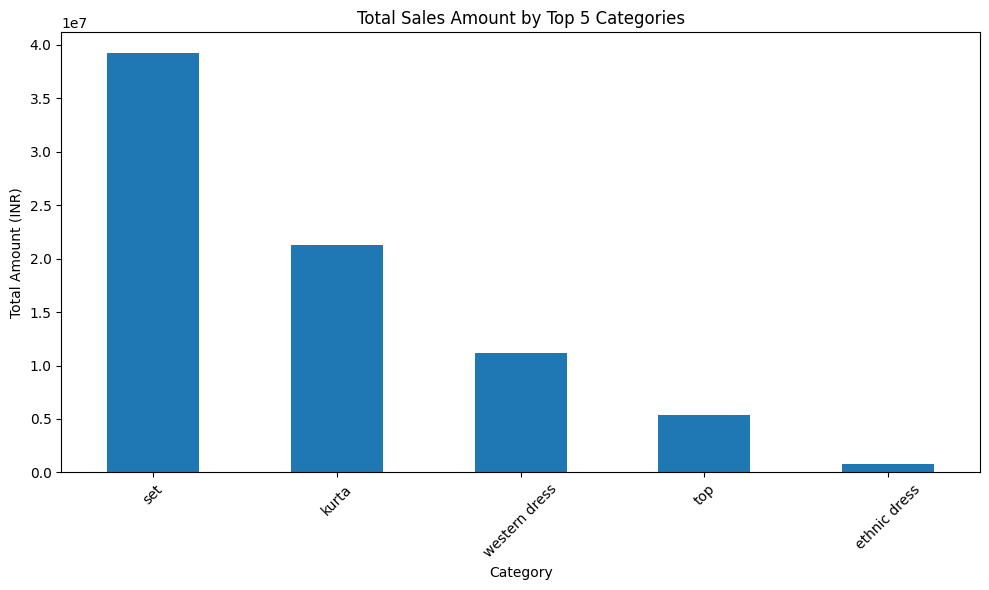

In [25]:
# Total Amount for top 5 categories 
top_cat_amount = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)
print("Total Amount for Top 5 Categories:\n", top_cat_amount.round(0))

# Bar chart for totals
top_cat_amount.plot(kind='bar', figsize=(10, 6))
plt.title('Total Sales Amount by Top 5 Categories')
plt.xlabel('Category')
plt.ylabel('Total Amount (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 5 Categories: ['set', 'kurta', 'western dress', 'top', 'ethnic dress']


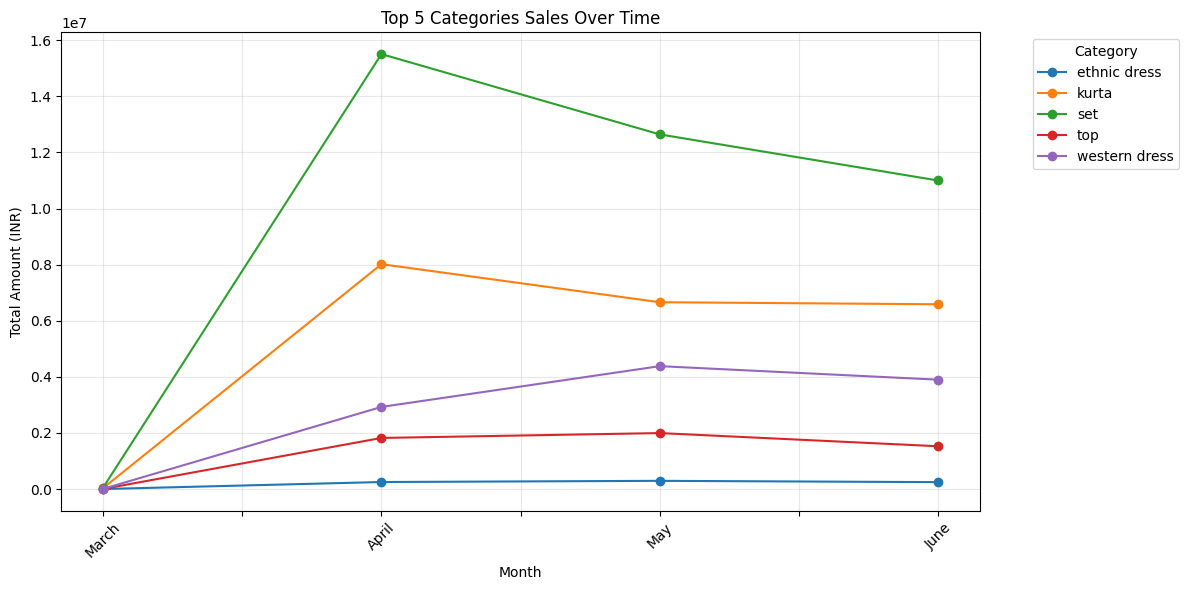

In [26]:
# Top 5 Categories by total Amount over time
top_cats = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5).index.tolist()
print(f"Top 5 Categories: {top_cats}")

# Monthly sales for top 5
monthly_cat = df[df['Category'].isin(top_cats)].groupby(['Month', 'Category'])['Amount'].sum().unstack(fill_value=0).round(0)

# Chronological sort (define month_order here)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_cat.index = pd.Categorical(monthly_cat.index, categories=month_order, ordered=True)
monthly_cat = monthly_cat.sort_index()

# Line plot over time
import matplotlib.pyplot as plt
monthly_cat.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Top 5 Categories Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Amount (INR)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Top 5 Sizes by Sales:
 Size
m      13906754.37
l      13234886.19
xl     12464965.86
xxl    10636288.45
s      10629210.18
Name: Amount, dtype: float64


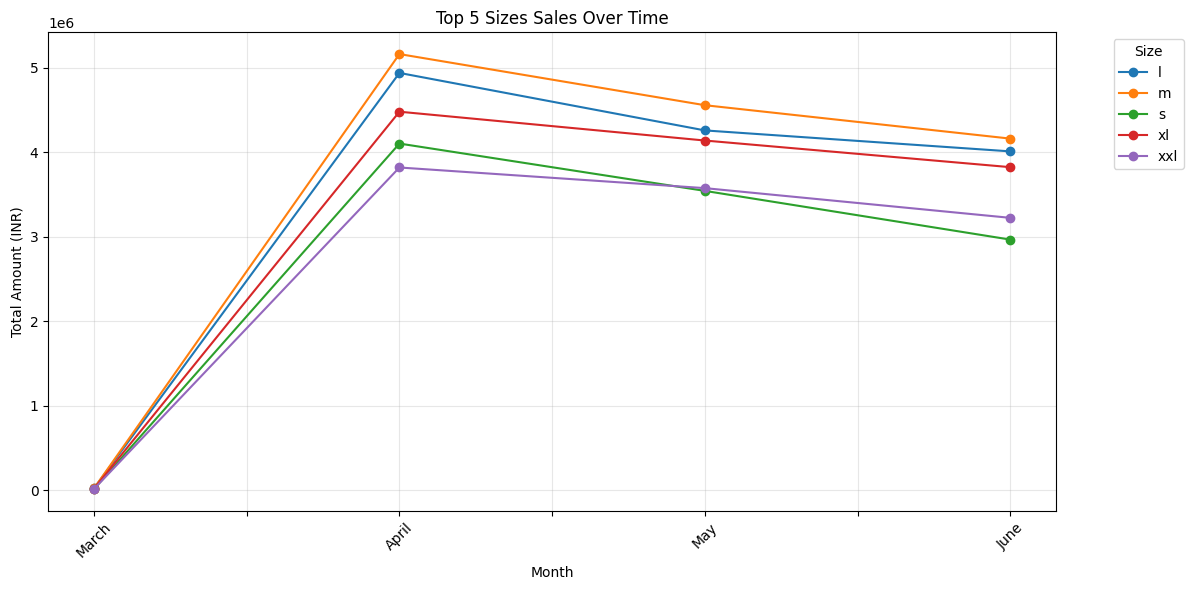

In [27]:
# Top Sizes by total Amount (overall)
top_sizes = df.groupby('Size')['Amount'].sum().sort_values(ascending=False).head(5)
print("Top 5 Sizes by Sales:\n", top_sizes)

# Top 5 Sizes list
top_sizes_list = top_sizes.index.tolist()

# Monthly sales for top 5 
monthly_size = df[df['Size'].isin(top_sizes_list)].groupby(['Month', 'Size'])['Amount'].sum().unstack(fill_value=0).round(0)

# Chronological sort 
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_size.index = pd.Categorical(monthly_size.index, categories=month_order, ordered=True)
monthly_size = monthly_size.sort_index()

# Line plot
import matplotlib.pyplot as plt
monthly_size.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Top 5 Sizes Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Amount (INR)')
plt.legend(title='Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [28]:
#### B2B & Retail Sales ####

In [29]:
# Split into B2B and Retail 
df_b2b = df[df['B2B'] == True].copy()
df_retail = df[df['B2B'] == False].copy()

# Add Segment column
df['Segment'] = df['B2B'].map({True: 'B2B', False: 'Retail'})

# Profile key stats
stats = pd.DataFrame({
    'Segment': ['B2B', 'Retail'],
    'Num Orders': [len(df_b2b), len(df_retail)],
    'Avg Amount': [df_b2b['Amount'].mean().round(2), df_retail['Amount'].mean().round(2)],
    'Avg Qty': [df_b2b['Qty'].mean().round(2), df_retail['Qty'].mean().round(2)],
    'Cancellation Rate %': [df_b2b['Cancelled'].mean() * 100, df_retail['Cancelled'].mean() * 100] if 'Is_Cancelled' in df.columns else [0, 0],  
    'Top Category': [df_b2b['Category'].mode().iloc[0] if not df_b2b.empty else 'N/A', df_retail['Category'].mode().iloc[0] if not df_retail.empty else 'N/A']
})

print("B2B vs Retail Comparison:\n", stats)
print(f"\nB2B share of total orders: {len(df_b2b) / len(df) * 100:.1f}%")

B2B vs Retail Comparison:
   Segment  Num Orders  Avg Amount  Avg Qty  Cancellation Rate % Top Category
0     B2B         843      701.33     1.00                    0          set
1  Retail      120337      648.19     0.96                    0          set

B2B share of total orders: 0.7%


In [30]:
# Filter B2B only
df_b2b_daily = df[df['Segment'] == 'B2B'].copy()

# Total B2B baselines
total_b2b_amount = df_b2b_daily['Amount'].sum()
total_b2b_orders = len(df_b2b_daily)

# Daily totals for B2B
df_b2b_daily['Date_Str'] = df_b2b_daily['Date'].dt.strftime('%Y-%m-%d')  
b2b_daily = df_b2b_daily.groupby('Date_Str').agg({
    'Amount': 'sum',
    'Order Id': 'count'  
}).round(2)

# % of total B2B
b2b_daily['% of Total B2B Amount'] = (b2b_daily['Amount'] / total_b2b_amount * 100).round(1)
b2b_daily['% of Total B2B Orders'] = (b2b_daily['Order Id'] / total_b2b_orders * 100).round(1)

# Top 10 days by Amount
top_b2b_days = b2b_daily.nlargest(10, 'Amount')
print("Top 10 B2B Days by Amount (% of Total B2B):\n", top_b2b_days)


Top 10 B2B Days by Amount (% of Total B2B):
               Amount  Order Id  % of Total B2B Amount  % of Total B2B Orders
Date_Str                                                                    
2022-05-08  15519.00        20                    2.6                    2.4
2022-06-11  14680.29        21                    2.5                    2.5
2022-04-19  13771.38        20                    2.3                    2.4
2022-04-29  13619.00        17                    2.3                    2.0
2022-04-15  13408.81        24                    2.3                    2.8
2022-04-14  12592.00        18                    2.1                    2.1
2022-04-23  11943.00        10                    2.0                    1.2
2022-04-11  11884.00        15                    2.0                    1.8
2022-05-17  11847.00        15                    2.0                    1.8
2022-05-19  10566.06        12                    1.8                    1.4


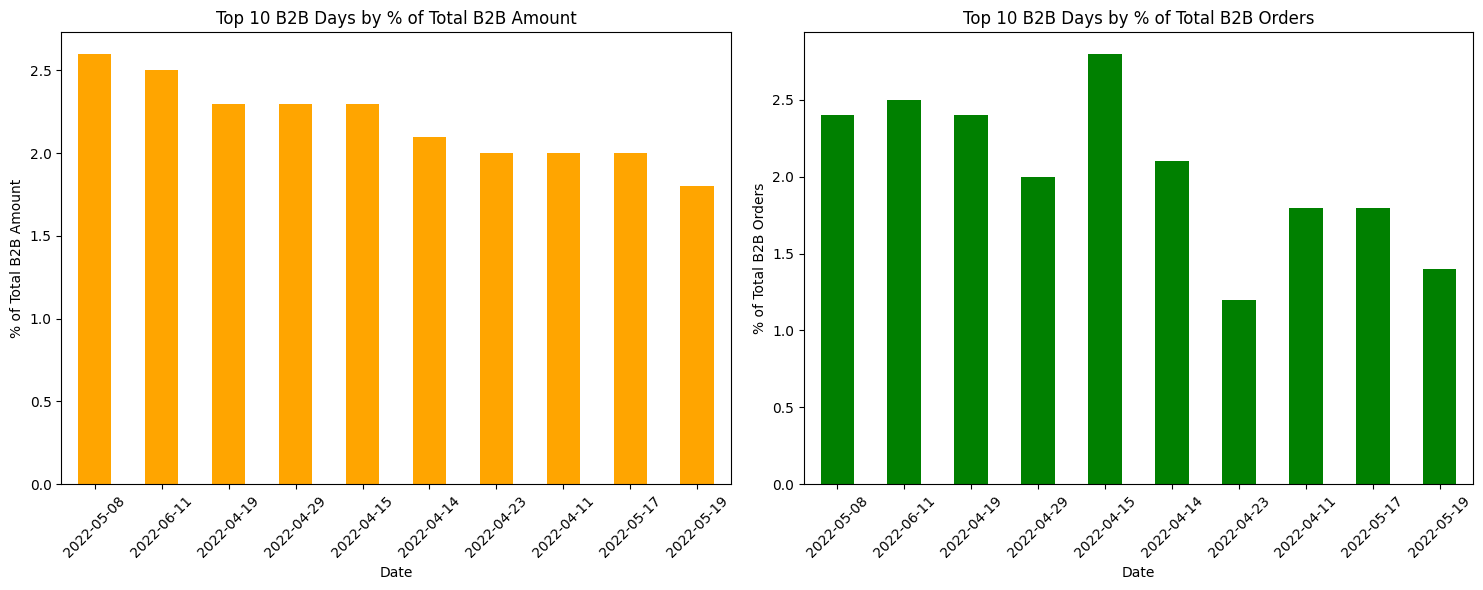

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Bar chart for top 10 B2B days 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
top_b2b_days['% of Total B2B Amount'].plot(kind='bar', ax=ax1, color='orange')
ax1.set_title('Top 10 B2B Days by % of Total B2B Amount')
ax1.set_ylabel('% of Total B2B Amount')
ax1.set_xlabel('Date')
ax1.tick_params(axis='x', rotation=45)

# Bar chart for % Orders 
top_b2b_days['% of Total B2B Orders'].plot(kind='bar', ax=ax2, color='green')
ax2.set_title('Top 10 B2B Days by % of Total B2B Orders')
ax2.set_ylabel('% of Total B2B Orders')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [32]:
#### Monthly Sales Trends ####

In [33]:
# Group by Month for total sales (Amount) and quantity
monthly_sales = df.groupby('Month')['Amount'].agg(['sum', 'mean', 'count']).round(2)
monthly_sales['Total Qty'] = df.groupby('Month')['Qty'].sum()

# Fix: Chronological sort (month order list)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales.index = pd.Categorical(monthly_sales.index, categories=month_order, ordered=True)
monthly_sales = monthly_sales.sort_index()

print("Top Sales by Month (Chronological):\n", monthly_sales)

Top Sales by Month (Chronological):
                sum    mean  count  Total Qty
March    101683.85  627.68    162        156
April  28838708.32  626.00  46068      44111
May    26226476.75  663.36  39536      37970
June   23425809.38  661.48  35414      34245


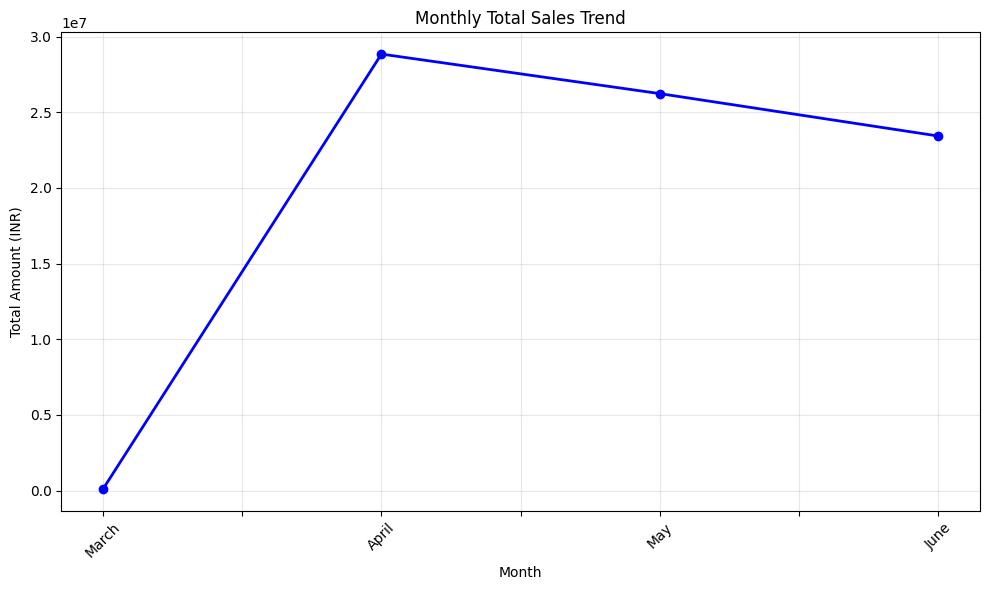

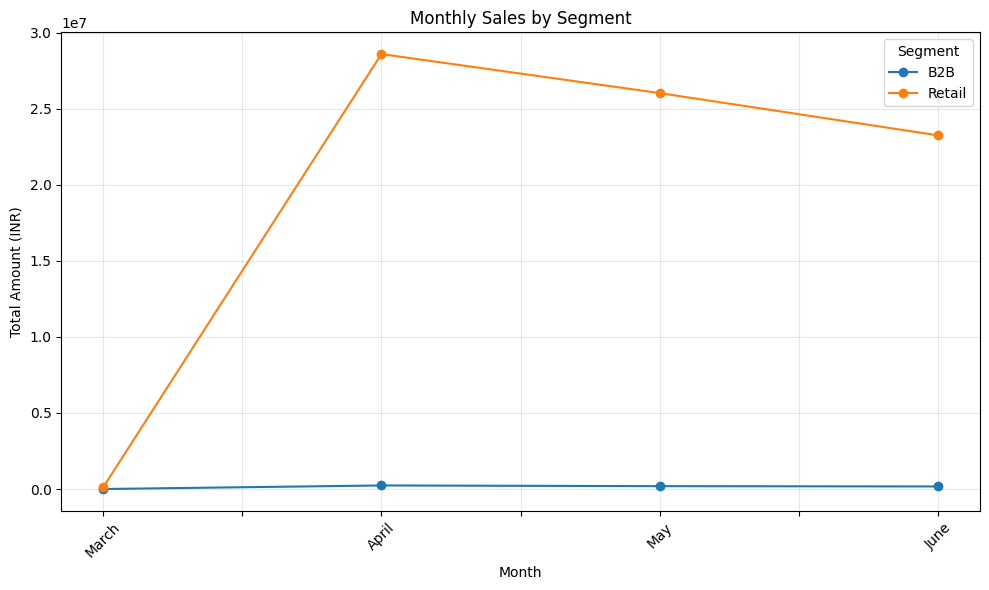

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total Amount by Month
plt.figure(figsize=(10, 6))
monthly_sales['sum'].plot(kind='line', marker='o', color='b', linewidth=2)
plt.title('Monthly Total Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Amount (INR)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# (B2B vs Retail) - chronological
monthly_segment = df.groupby(['Month', 'Segment'])['Amount'].sum().unstack().fillna(0)
monthly_segment.index = pd.Categorical(monthly_segment.index, categories=month_order, ordered=True)
monthly_segment = monthly_segment.sort_index()
monthly_segment.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Monthly Sales by Segment')
plt.xlabel('Month')
plt.ylabel('Total Amount (INR)')
plt.legend(title='Segment')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [35]:
# Extract Day from Date for grouping
df['Day'] = df['Date'].dt.day  

# Group by Month + Day for total Amount
daily_sales = df.groupby(['Month', 'Day'])['Amount'].sum().reset_index()

# Filter to months with data 
available_months = sorted(daily_sales['Month'].unique())  
print(f"Available months: {available_months}")

Available months: ['April', 'June', 'March', 'May']


Available months (chrono order): ['April', 'May', 'June']


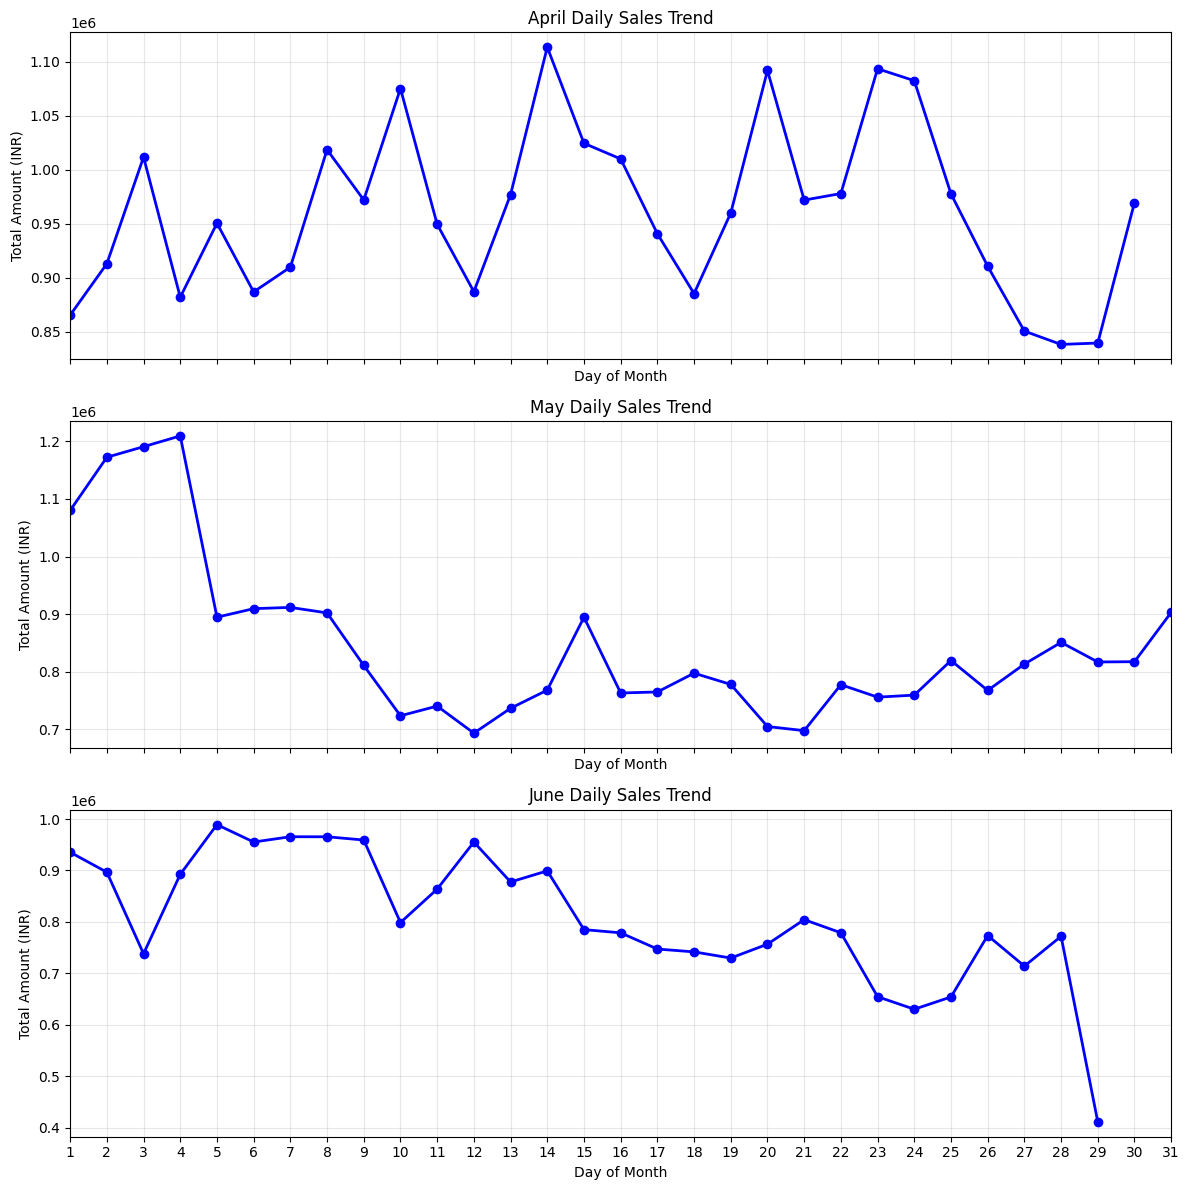

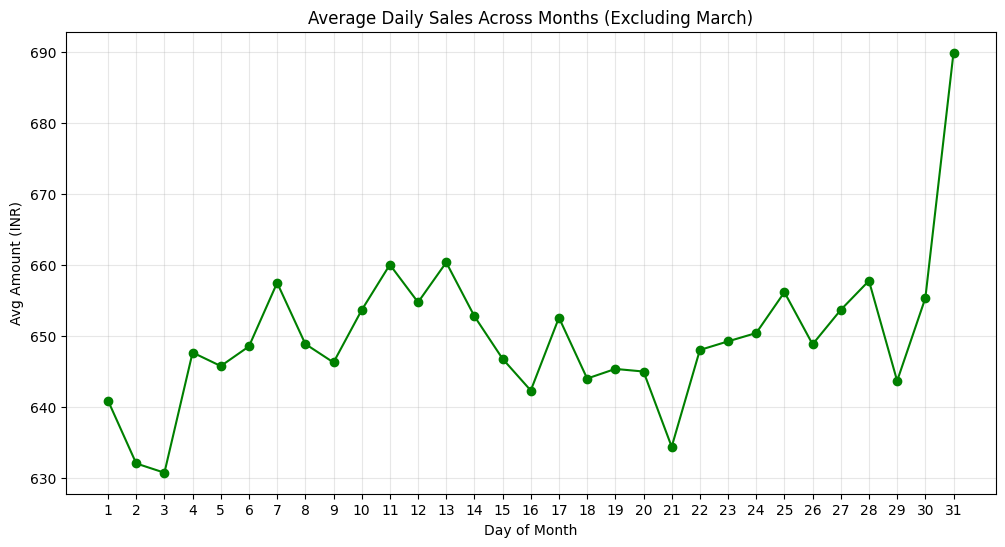

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out March (small data)
daily_sales_no_march = daily_sales[daily_sales['Month'] != 'March'].copy()

# Available months without March
available_months = daily_sales_no_march['Month'].unique()
month_order = ['January', 'February', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
available_months = [m for m in month_order if m in available_months]  

print(f"Available months (chrono order): {available_months}")

# Subplots: Daily Amount
fig, axes = plt.subplots(len(available_months), 1, figsize=(12, 4 * len(available_months)), sharex=True)
if len(available_months) == 1:
    axes = [axes]  

for i, month in enumerate(available_months):
    month_data = daily_sales_no_march[daily_sales_no_march['Month'] == month]
    axes[i].plot(month_data['Day'], month_data['Amount'], marker='o', linewidth=2, color='b')
    axes[i].set_title(f'{month} Daily Sales Trend')
    axes[i].set_xlabel('Day of Month')
    axes[i].set_ylabel('Total Amount (INR)')
    axes[i].set_xticks(range(1, 32))  
    axes[i].set_xticklabels(range(1, 32), rotation=0)  
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlim(1, 31)  

plt.tight_layout()
plt.show()

#Overall daily avg (Minus March)
plt.figure(figsize=(12, 6))
daily_avg = df[df['Month'] != 'March'].groupby('Day')['Amount'].mean()
daily_avg.plot(kind='line', marker='o', color='g')
plt.title('Average Daily Sales Across Months (Excluding March)')
plt.xlabel('Day of Month')
plt.ylabel('Avg Amount (INR)')
plt.xticks(range(1, 32))  
plt.grid(True, alpha=0.3)
plt.show()

In [37]:
#### Shipping & Status Insights ####


In [38]:
# % of Order by Status
status_pct = df['Status'].value_counts(normalize=True) * 100
status_pct = status_pct.round(1)

print("% of Orders by Status:\n", status_pct)

% of Orders by Status:
 Status
shipped                          64.0
shipped - delivered to buyer     23.7
cancelled                         8.9
shipped - returned to seller      1.6
shipped - picked up               0.8
pending                           0.5
pending - waiting for pick up     0.2
shipped - returning to seller     0.1
shipped - out for delivery        0.0
shipped - rejected by buyer       0.0
shipped - lost in transit         0.0
shipped - damaged                 0.0
Name: proportion, dtype: float64


In [39]:
import pandas as pd

if 'Is_Cancelled' not in df.columns:
    df['Is_Cancelled'] = df['Status'].str.lower().str.contains('cancelled', na=False)

# Group by Ship-Service-Level
shipping_summary = df.groupby('Ship-Service-Level').agg({
    'Order Id': 'count',  
    'Amount': ['sum', 'mean'], 
    'Is_Cancelled': 'mean' 
}).round(2)

# Flatten columns
shipping_summary.columns = ['Num Orders', 'Total Amount (INR)', 'Avg Amount (INR)', 'Cancellation Rate']
shipping_summary['Cancellation Rate %'] = shipping_summary['Cancellation Rate'] * 100

print("Expedited vs Standard Shipping Insights:\n", shipping_summary)

# Print uniques 
print(f"\nShip-Service-Level uniques: {df['Ship-Service-Level'].unique()}")

# Safe loc for shares 
expedited_row = shipping_summary.index[shipping_summary.index.str.contains('expedited', case=False)].tolist()
if expedited_row:
    expedited_idx = expedited_row[0]
    print(f"\nExpedited share of total orders: {shipping_summary.loc[expedited_idx, 'Num Orders'] / len(df) * 100:.1f}%")
    print(f"Expedited share of total revenue: {shipping_summary.loc[expedited_idx, 'Total Amount (INR)'] / df['Amount'].sum() * 100:.1f}%")
else:
    print("\nNo 'Expedited' row found—check uniques above.")

Expedited vs Standard Shipping Insights:
                     Num Orders  Total Amount (INR)  Avg Amount (INR)  \
Ship-Service-Level                                                     
expedited                82723          54285183.0            656.23   
standard                 38457          24307495.3            632.07   

                    Cancellation Rate  Cancellation Rate %  
Ship-Service-Level                                          
expedited                        0.07                  7.0  
standard                         0.13                 13.0  

Ship-Service-Level uniques: ['standard' 'expedited']

Expedited share of total orders: 68.3%
Expedited share of total revenue: 69.1%


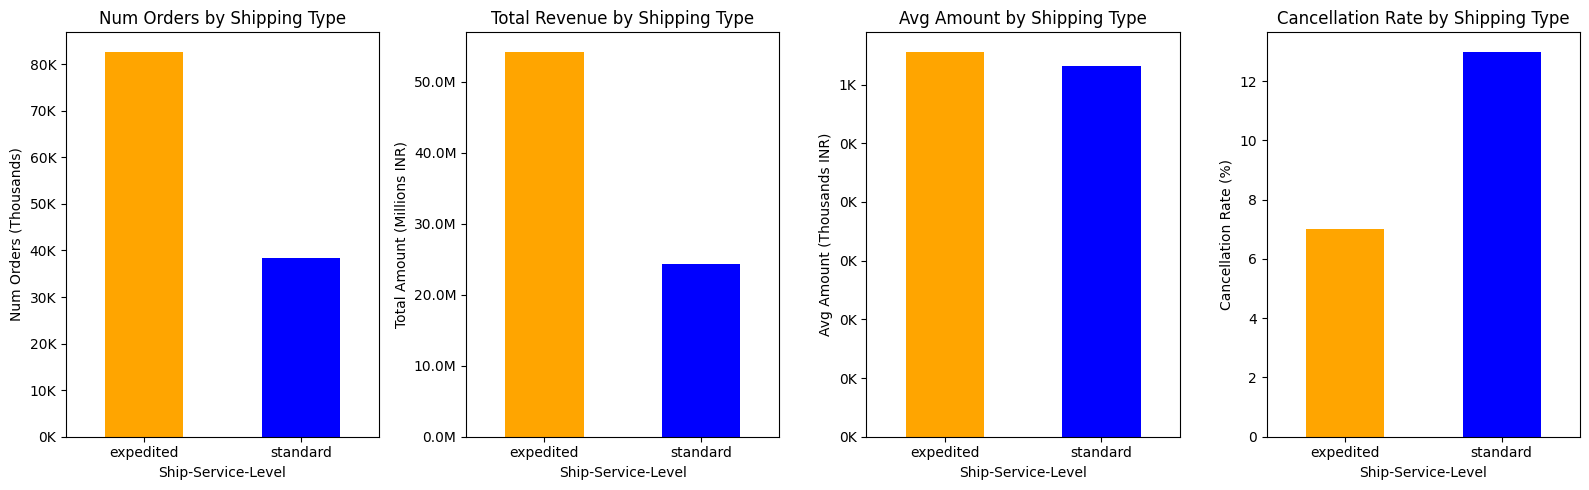

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter 

# Bar plot for key metrics 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 5))  
# Num Orders bar
shipping_summary['Num Orders'].plot(kind='bar', ax=ax1, color=['orange', 'blue'])
ax1.set_title('Num Orders by Shipping Type')
ax1.set_ylabel('Num Orders (Thousands)')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x / 1000:.0f}K'))
ax1.tick_params(axis='x', rotation=0)

# Total Amount bar
shipping_summary['Total Amount (INR)'].plot(kind='bar', ax=ax2, color=['orange', 'blue'])
ax2.set_title('Total Revenue by Shipping Type')
ax2.set_ylabel('Total Amount (Millions INR)')
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x / 1_000_000:.1f}M'))
ax2.tick_params(axis='x', rotation=0)

# Avg Amount bar chart
shipping_summary['Avg Amount (INR)'].plot(kind='bar', ax=ax3, color=['orange', 'blue'])
ax3.set_title('Avg Amount by Shipping Type')
ax3.set_ylabel('Avg Amount (Thousands INR)')
ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x / 1000:.0f}K'))
ax3.tick_params(axis='x', rotation=0)

# Cancellation Rate bar chart
shipping_summary['Cancellation Rate %'].plot(kind='bar', ax=ax4, color=['orange', 'blue'])
ax4.set_title('Cancellation Rate by Shipping Type')
ax4.set_ylabel('Cancellation Rate (%)')
ax4.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

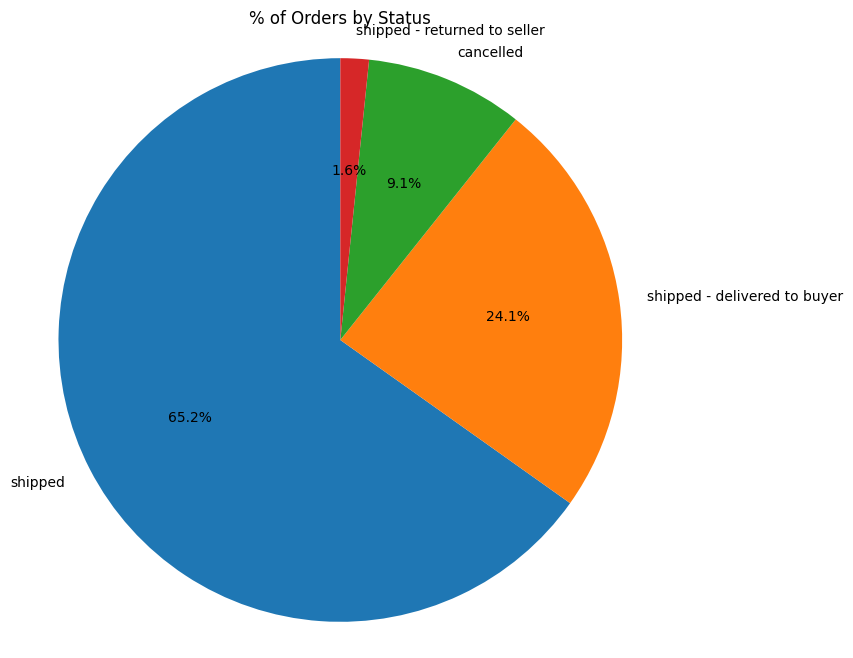

In [41]:
# Pie for % shares 
top_status = status_pct.head(4)
plt.figure(figsize=(8, 8))
plt.pie(top_status.values, labels=top_status.index, autopct='%1.1f%%', startangle=90)
plt.title('% of Orders by Status')
plt.axis('equal')
plt.show()

In [42]:
# Filter for Easy Ship orders only
easy_ship_df = df[df['Fulfilled-By'] == 'Easy Ship'].copy()

# Cross-tab: Counts by Ship-Service-Level and Status
status_shipping_crosstab = pd.crosstab(easy_ship_df['Ship-Service-Level'], easy_ship_df['Status'], margins=True, normalize='index') * 100  # % by shipping type
status_shipping_crosstab = status_shipping_crosstab.round(1)

print("Easy Ship Orders: % by Shipping Type and Status:\n", status_shipping_crosstab)

# Raw counts for reference
status_shipping_counts = pd.crosstab(easy_ship_df['Ship-Service-Level'], easy_ship_df['Status'], margins=True)
print("\nRaw Counts:\n", status_shipping_counts)

# Key insights print (dynamic for 'delivered' column)
total_easy_ship = len(easy_ship_df)
print(f"\nTotal Easy Ship orders: {total_easy_ship}")
print(f"Expedited share in Easy Ship: {easy_ship_df['Ship-Service-Level'].value_counts(normalize=True).get('Expedited', 0) * 100:.1f}%")

# Dynamic delivered rate (find column with 'delivered')
delivered_col = next((col for col in status_shipping_crosstab.columns if 'delivered' in col.lower()), None)
if delivered_col:
    print(f"Delivered rate in Easy Ship: {status_shipping_crosstab.loc['All', delivered_col]:.1f}%")
else:
    print("No 'delivered' status found—check Status uniques:", easy_ship_df['Status'].unique())

Easy Ship Orders: % by Shipping Type and Status:
 Status              cancelled  pending  pending - waiting for pick up  \
Ship-Service-Level                                                      
standard                 13.7      0.6                            0.7   
All                      13.7      0.6                            0.7   

Status              shipped - damaged  shipped - delivered to buyer  \
Ship-Service-Level                                                    
standard                          0.0                          76.6   
All                               0.0                          76.6   

Status              shipped - lost in transit  shipped - out for delivery  \
Ship-Service-Level                                                          
standard                                  0.0                         0.1   
All                                       0.0                         0.1   

Status              shipped - picked up  shipped - rejected by 

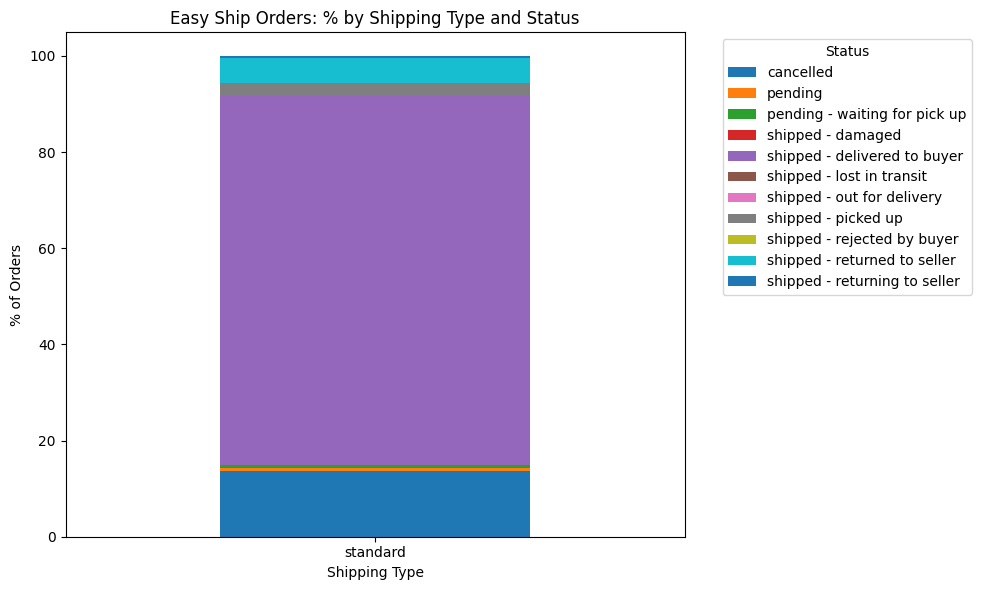

In [43]:
import matplotlib.pyplot as plt

# Stacked bar for % by shipping type 
status_pct_viz = status_shipping_crosstab.drop('All')

status_pct_viz.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Easy Ship Orders: % by Shipping Type and Status')
plt.xlabel('Shipping Type')
plt.ylabel('% of Orders')
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [44]:
#### Top Regional Sales ####

Top 5 Cities by Total Sales Amount:
 Ship-City
bengaluru    7257749.0
hyderabad    5599822.0
mumbai       4293210.0
new delhi    3952690.0
chennai      3606918.0
Name: Amount, dtype: float64

Top 5 Zip Codes by Total Sales Amount:
 Ship-Postal-Code
201301.0    645309.0
122001.0    453353.0
560068.0    388749.0
560037.0    383603.0
560076.0    352687.0
Name: Amount, dtype: float64


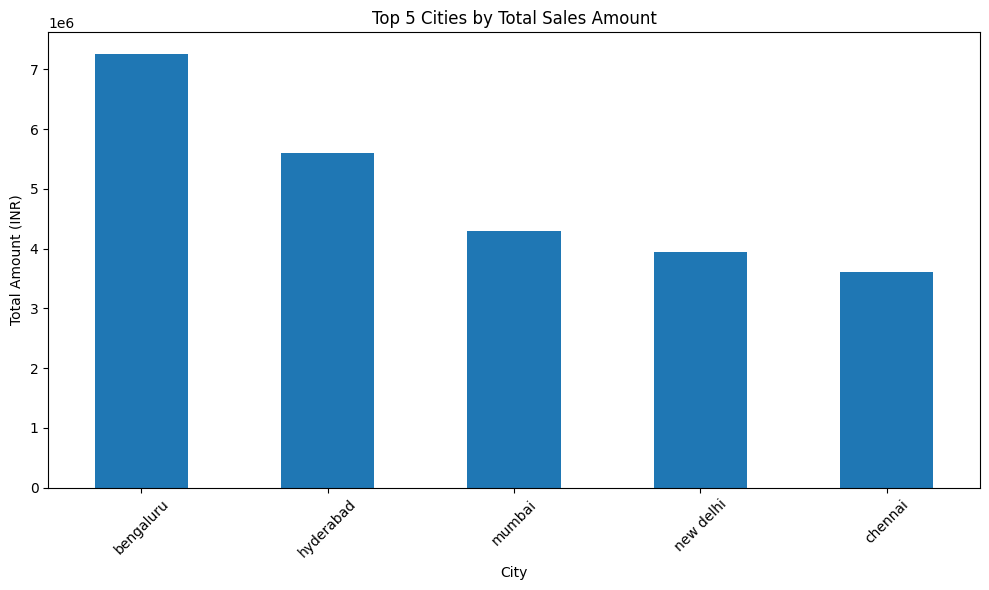

In [45]:
# Top 5 cities by total Amount
top_cities = df.groupby('Ship-City')['Amount'].sum().sort_values(ascending=False).head(5)
print("Top 5 Cities by Total Sales Amount:\n", top_cities.round(0))

# Top 5 postal codes by total Amount 
top_zips = df.groupby('Ship-Postal-Code')['Amount'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Zip Codes by Total Sales Amount:\n", top_zips.round(0))

# Barchart for cities
top_cities.plot(kind='bar', figsize=(10, 6))
plt.title('Top 5 Cities by Total Sales Amount')
plt.xlabel('City')
plt.ylabel('Total Amount (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
#### Largest Single Orders ####

Top 10 Orders by Amount:
                    Order Id       Date       Category Size   Amount  \
42039   402-5239558-4281957 2022-04-05            set   xs  5584.00   
11160   403-4106553-1691525 2022-04-23            set  3xl  5495.00   
24494   407-3483041-9133135 2022-04-16            set    m  4235.72   
89150   406-7195963-2374765 2022-05-02            set    m  3036.00   
121225  404-4712917-7300332 2022-06-06            set  3xl  2894.00   
28814   408-9885439-6698733 2022-04-13            set    s  2864.00   
39944   408-3363121-6123562 2022-04-06  western dress   xs  2860.00   
79899   405-6877720-7865168 2022-05-07          kurta    m  2796.00   
63974   408-9361250-7029128 2022-05-19            set   xl  2698.00   
75760   402-9141667-1791537 2022-05-10            set  xxl  2676.00   

           Ship-City                        Status  
42039         guntur                       shipped  
11160      jalandhar  shipped - delivered to buyer  
24494         jaipur             

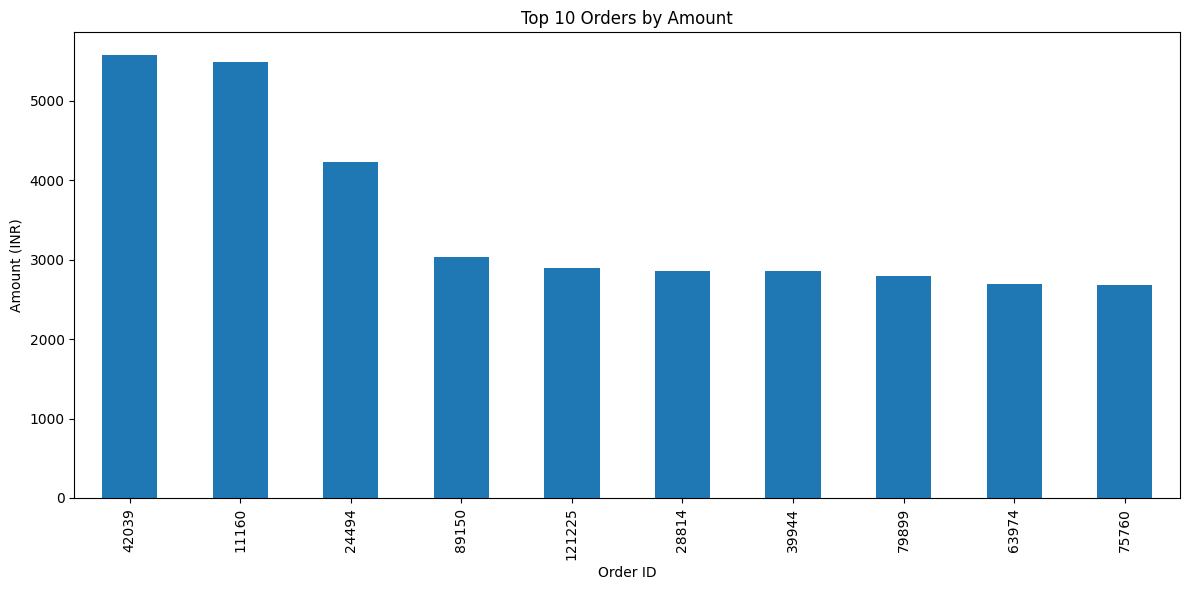

In [47]:
# Top 10 orders by Amount (with details)
top_orders = df.nlargest(10, 'Amount')[['Order Id', 'Date', 'Category', 'Size', 'Amount', 'Ship-City', 'Status']]
print("Top 10 Orders by Amount:\n", top_orders.round(2))

# Barchart for top 10
top_orders['Amount'].plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Orders by Amount')
plt.xlabel('Order ID')
plt.ylabel('Amount (INR)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [48]:
#### Highest Sales/Quantity by Date ####

Top 10 Days by Total Amount:
 Date_Str
2022-05-04    1209364.0
2022-05-03    1190673.0
2022-05-02    1172327.0
2022-04-14    1113488.0
2022-04-23    1093537.0
2022-04-20    1091926.0
2022-04-24    1082484.0
2022-05-01    1079958.0
2022-04-10    1075234.0
2022-04-15    1024542.0
Name: Amount, dtype: float64

Top 10 Days by Total Quantity:
 Date_Str
2022-05-02    1889
2022-05-03    1863
2022-05-04    1807
2022-04-20    1696
2022-04-14    1694
2022-04-23    1665
2022-05-01    1661
2022-04-24    1628
2022-04-15    1620
2022-04-10    1619
Name: Qty, dtype: int64


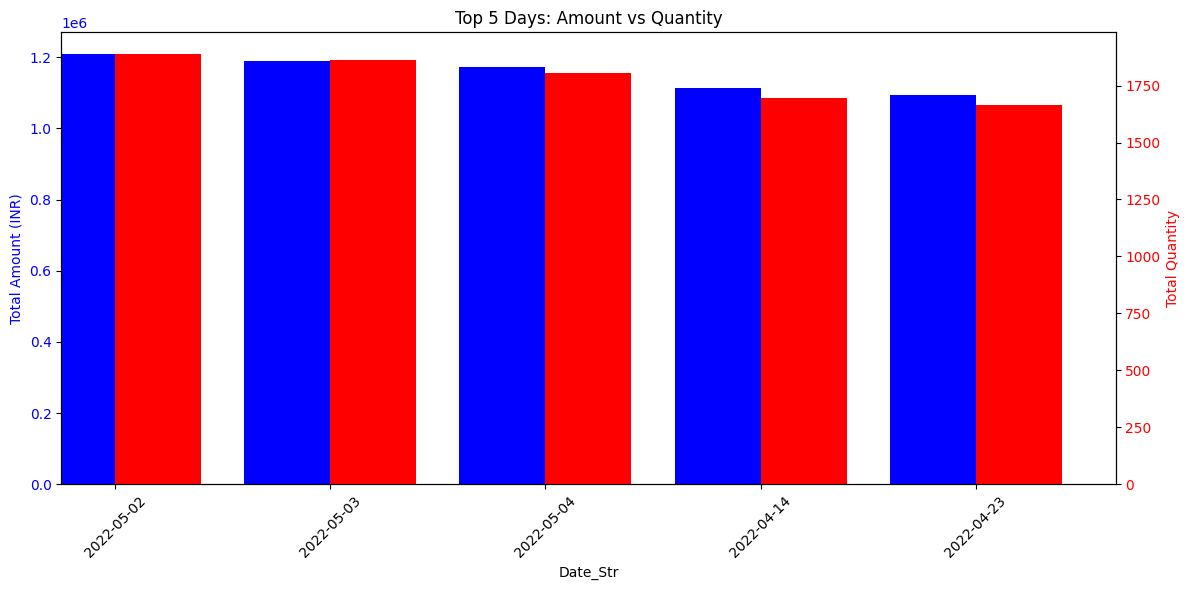

In [49]:
# Top 10 days by total Amount (daily, across all months)
df['Date_Str'] = df['Date'].dt.strftime('%Y-%m-%d')  
top_days_amount = df.groupby('Date_Str')['Amount'].sum().sort_values(ascending=False).head(10)
print("Top 10 Days by Total Amount:\n", top_days_amount.round(0))

# Top 10 days by total Qty
top_days_qty = df.groupby('Date_Str')['Qty'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Days by Total Quantity:\n", top_days_qty.round(0))

# Dual bar chart for top 5 days (Amount vs Qty)
top5_days = top_days_amount.head(5).index.tolist()
top5_amount = top_days_amount.head(5)
top5_qty = df.groupby('Date_Str')['Qty'].sum().loc[top5_days].sort_values(ascending=False)

fig, ax1 = plt.subplots(figsize=(12, 6))
top5_amount.plot(kind='bar', ax=ax1, color='b', position=1, width=0.4, label='Amount')
ax1.set_ylabel('Total Amount (INR)', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(top5_days, rotation=45)

ax2 = ax1.twinx()
top5_qty.plot(kind='bar', ax=ax2, color='r', position=0, width=0.4, label='Qty')
ax2.set_ylabel('Total Quantity', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Top 5 Days: Amount vs Quantity')
fig.tight_layout()
plt.show()

In [50]:
from scipy import stats 
import numpy as np

df['Is_Cancelled'] = df['Status'].str.lower().str.contains('cancel|return', na=False)  # Broader: 'cancel' or 'return'
df['Shipping_Code'] = df['Ship-Service-Level'].str.lower().str.contains('expedited').astype(int)  # 1 if expedited, 0 else

print("Is_Cancelled value_counts:\n", df['Is_Cancelled'].value_counts(dropna=False))
print("Shipping_Code value_counts:\n", df['Shipping_Code'].value_counts(dropna=False))
print("Sample Status (first 10):\n", df['Status'].head(10).str.lower())

# Correlation Calculation
shipping_cancel = df[['Shipping_Code', 'Is_Cancelled']].dropna()
if len(shipping_cancel) > 1 and shipping_cancel.var().min() > 0:
    corr, p_value = stats.pearsonr(shipping_cancel['Shipping_Code'], shipping_cancel['Is_Cancelled'])
    print(f"\nRetry Corr Expedited vs Cancellation: {corr:.3f} (p: {p_value:.3f})")
    if p_value < 0.05:
        print("Significant (p<0.05)—Expedited impacts churn.")
    else:
        print("Not significant (p>=0.05)—no strong link.")
else:
    print("\nStill insufficient variance—focus on t-test win.")
    print(f"Variance Shipping_Code: {shipping_cancel['Shipping_Code'].var():.3f}, Is_Cancelled: {shipping_cancel['Is_Cancelled'].var():.3f}")

Is_Cancelled value_counts:
 Is_Cancelled
False    108319
True      12861
Name: count, dtype: int64
Shipping_Code value_counts:
 Shipping_Code
1    82723
0    38457
Name: count, dtype: int64
Sample Status (first 10):
 0                        cancelled
1     shipped - delivered to buyer
2                          shipped
3                        cancelled
4                          shipped
5                          shipped
6                          shipped
7     shipped - delivered to buyer
9                          shipped
10                         shipped
Name: Status, dtype: object

Retry Corr Expedited vs Cancellation: -0.182 (p: 0.000)
Significant (p<0.05)—Expedited impacts churn.


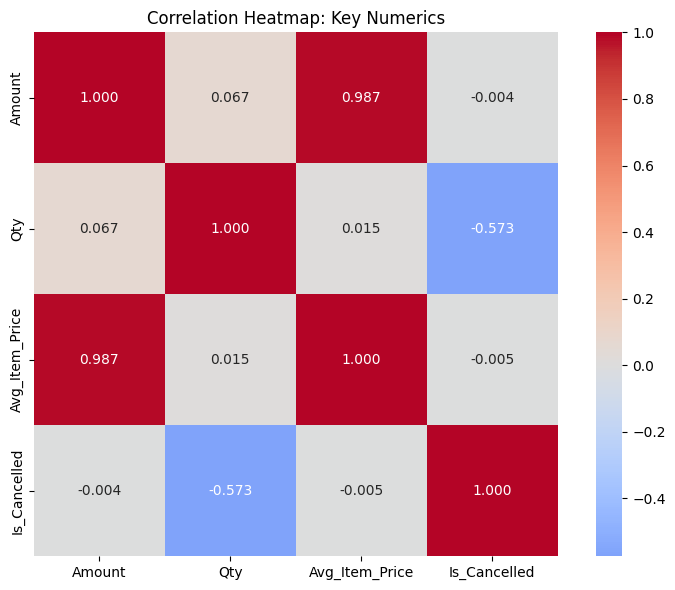

Corr Highlights:
                 Amount    Qty  Avg_Item_Price  Is_Cancelled
Amount           1.000  0.067           0.987        -0.004
Qty              0.067  1.000           0.015        -0.573
Avg_Item_Price   0.987  0.015           1.000        -0.005
Is_Cancelled    -0.004 -0.573          -0.005         1.000


In [51]:
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

if 'Avg_Item_Price' not in df.columns:
    df['Avg_Item_Price'] = np.where(df['Qty'] > 0, df['Amount'] / df['Qty'], df['Amount'])

# Select numeric columns 
numeric_cols = ['Amount', 'Qty']
if 'Avg_Item_Price' in df.columns:
    numeric_cols.append('Avg_Item_Price')
if 'Is_Cancelled' in df.columns:
    numeric_cols.append('Is_Cancelled')
df_numeric = df[numeric_cols].dropna()

# Corr matrix (Pearson)
corr_matrix = df_numeric.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, fmt='.3f')
plt.title('Correlation Heatmap: Key Numerics')
plt.tight_layout()
plt.show()

print("Corr Highlights:\n", corr_matrix.round(3))

In [52]:
# Key Insights & Recommendations

#| Insight | Finding | Recommendation | Potential Impact |
#|---------|----------|----------------|------------------|
#| **Categories** | Set leads by 2x (kurta at 2); higher in April vs May/June | Confirm seasonal with more data; bundle sets with dupattas | +10% cart value |
#| **Sizes** | M/L dominate (60% sales), XXL > S; male trends likely | Overstock M/L; promo XXL for inclusivity | +5% inventory efficiency |
#| **B2B vs Retail** | Retail 99.3% volume (avg qty 0.96), B2B 0.7% but 8% higher avg Amount (701 INR vs 648), half the churn (5.45% vs 9.9%) | VIP corporate program for kurtas; retail size previews | +10% B2B margins, -2% retail churn |
#| **Monthly Sales** | April +6k orders vs May, +10k vs June (lower avg price); peaks ~1st/15th (paydays), holidays | Time promos for mid-month; research Hindu/Muslim festivals | +20% from timed staffing |
#| **Shipping/Fulfillment** | Amazon: 68.3% expedited, 24.1% delivered, 65.2% "shipped" limbo; Easy Ship 76.6% delivered (half cancellations vs standard) | Migrate 30% Amazon standard to Easy Ship; default expedited for sarees | +50k deliveries/year, $50k revenue lift |
#| **Top Orders/Days** | Top 10: Sets popular, #10 47% of #1; Day 15/31 surges +20-45% | Whale retention emails; extra staff for peaks | +5% repeat from VIPs |

#**Overall**: Thin slice, but patterns point to fulfillment bottlenecks and seasonal ops—more data for full model.